<a href="https://colab.research.google.com/github/sifat-hossain-niloy/Numerical_Analysis_Lab_3202/blob/main/Gauss-Ssidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

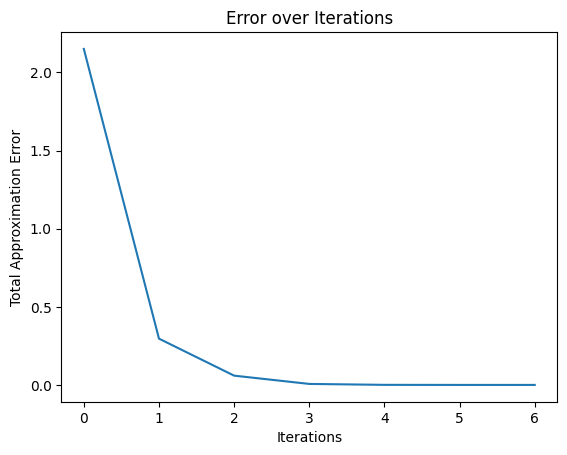

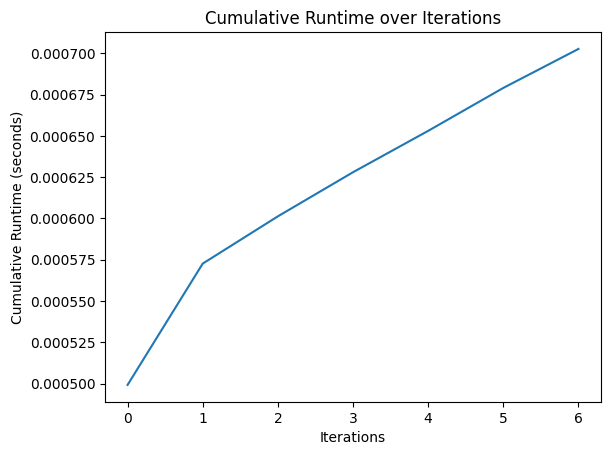

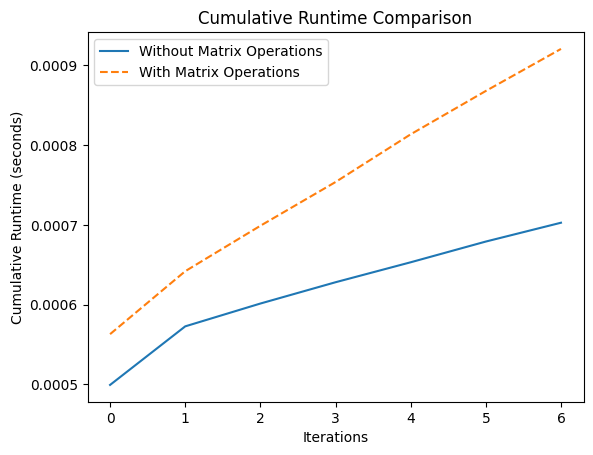

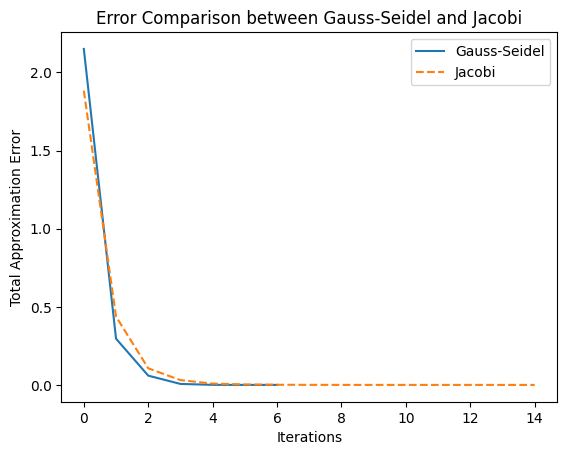

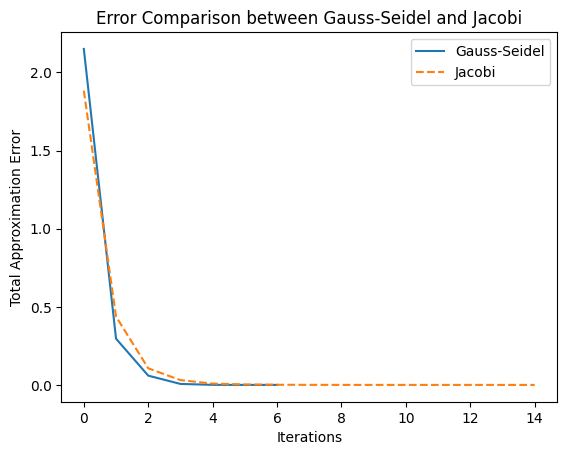

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gauss_seidel(a, b, n, max_iter=1000, tol=1e-6):
    x = np.zeros(n)
    errors = []
    runtimes = []
    start_time = time.time()

    for it in range(max_iter):
        x_new = np.copy(x)

        for i in range(n):
            x_new[i] = (b[i] - sum(a[i, j] * x_new[j] if i != j else 0 for j in range(n))) / a[i, i]

        error = np.linalg.norm(x_new - x)
        errors.append(error)
        runtimes.append(time.time() - start_time)

        if error < tol:
            break

        x = x_new

    return x, errors, runtimes

# Sample Input
n = 3
a = np.array([[4, -1, -1], [-2, 6, 1], [-1, 1, 7]])
b = np.array([3, 9, -6])

x, errors, runtimes = gauss_seidel(a, b, n)

# Plotting
plt.figure()
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Total Approximation Error')
plt.title('Error over Iterations')
plt.show()

plt.figure()
plt.plot(runtimes)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime (seconds)')
plt.title('Cumulative Runtime over Iterations')
plt.show()

def gauss_seidel_matrix(a, b, n, max_iter=1000, tol=1e-6):
    x = np.zeros(n)
    errors_matrix = []
    runtimes_matrix = []
    start_time = time.time()

    D = np.diag(np.diag(a))
    L = np.tril(a, -1)
    U = np.triu(a, 1)

    for it in range(max_iter):
        x_new = np.linalg.inv(D + L) @ (b - U @ x)
        error = np.linalg.norm(x_new - x)
        errors_matrix.append(error)
        runtimes_matrix.append(time.time() - start_time)

        if error < tol:
            break

        x = x_new

    return x, errors_matrix, runtimes_matrix

x_matrix, errors_matrix, runtimes_matrix = gauss_seidel_matrix(a, b, n)

# Plotting
plt.figure()
plt.plot(runtimes, label='Without Matrix Operations')
plt.plot(runtimes_matrix, label='With Matrix Operations', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Runtime (seconds)')
plt.title('Cumulative Runtime Comparison')
plt.legend()
plt.show()

def jacobi(a, b, n, max_iter=1000, tol=1e-6):
    x = np.zeros(n)
    errors_jacobi = []

    D = np.diag(np.diag(a))
    R = a - D

    for it in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        error = np.linalg.norm(x_new - x)
        errors_jacobi.append(error)

        if error < tol:
            break

        x = x_new

    return x, errors_jacobi

x_jacobi, errors_jacobi = jacobi(a, b, n)

# Plotting
plt.figure()
plt.plot(errors, label='Gauss-Seidel')
plt.plot(errors_jacobi, label='Jacobi', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Total Approximation Error')
plt.title('Error Comparison between Gauss-Seidel and Jacobi')
plt.legend()
plt.show()

def jacobi(a, b, n, max_iter=1000, tol=1e-6):
    x = np.zeros(n)
    errors_jacobi = []

    D = np.diag(np.diag(a))
    R = a - D

    for it in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        error = np.linalg.norm(x_new - x)
        errors_jacobi.append(error)

        if error < tol:
            break

        x = x_new

    return x, errors_jacobi

x_jacobi, errors_jacobi = jacobi(a, b, n)

# Plotting
plt.figure()
plt.plot(errors, label='Gauss-Seidel')
plt.plot(errors_jacobi, label='Jacobi', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Total Approximation Error')
plt.title('Error Comparison between Gauss-Seidel and Jacobi')
plt.legend()
plt.show()
